<a href="https://colab.research.google.com/github/lcsiv/csvfiles/blob/main/Python_Projeto_Final_Curso_Python_Para_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **`Python: Projeto Final - Curso Python Para Análise de Dados `**        
          Análise de possíveis causas comuns que levem os clientes do banco EBAC para a situação de inadimplência .


# **TÓPICOS**

1.   Contextualização.
2.   Exploração e Tratamento dos Dados.
3.   Análise e Vizualição Gráfica dos Dados.
4.   Conclusões.





# 1)   CONTEXTUALIZAÇÃO

Esse trabalho apresenta uma análise de clientes de um banco fictício, chamado banco EBAC.

Nessa análise poderemos analisar e cruzar diversas informações a respeito dos clientes , tentando identificar padrões e variáveis comuns que costumam levar o cliente ao quadro de inadimplência.

Ou seja, na própria base que analisaremos já temos a principal informação, que é a identificação de clientes em quadro de inadimplência, essa informação por si só já irá demandar um grande esforço do banco em acertar, caso a caso, em acordos, as vezes até mesmos judiciais a recuperação desse crédito concedido.

Porém o trabalho aqui, utilizando o Python, será tentar identificar variáveis independentes que levam os clientes a atingir essa situação, que não é interessante aos clientes e muito menos ao banco, evitandos futuras perdas financeiras e retrabalhos.



# 2)   EXPLORAÇÃO E TRATAMENTOS DOS DADOS

### LOCALIZAÇÃO DE NOSSA BASE DE DADOS
   A base de dados que trabalheremos está salva dentro da plataforma GitHub,e é um arquivo em formato csv, e pode ser acessado através do link abaixo:

   https://raw.githubusercontent.com/lcsiv/csvfiles/main/Python_M10_support%20material.csv

Nós iremos associar essa base de dados a variável "df" em nosso notebook, para isso a primeira coisa que teremos que fazer é importar o pacote do *pandas*, dessa maneira conseguimos nos conectar diretamente ao arquivo original.

In [ ]:
import pandas as pd

In [ ]:
### CRIANDO VARIÁVEL df E ATRIBUINDO CONTEÚDO DO ARQUIVO NELA: ###

df = pd.read_csv('https://raw.githubusercontent.com/lcsiv/csvfiles/main/Python_M10_support%20material.csv', na_values='na')

## IMPORTAÇÃO DE PACOTES QUE IREMOS TRABALHAR
   Para esse trabalho, iremos utilizar o Python, sempre dentro desse Notebook no ambiente do Google Colab e também precisaremos importar os pacotes abaixo:

1.   pandas, já importamos acima, para manipulação e tratamentos dos dados do arquivo csv;

2.   seabor, para análise e vizualição gráfica das informações;

3.   matplotlib, também vizualição gráfica das informações;



In [ ]:
### IMPORTAÇÃO DO RESTANTE DOS PACOTES: ###

import seaborn as sns
import matplotlib.pyplot as plt

## LINHAS INICIAIS DE CÓDIGO PARA UMA PRIMEIRA IMPRESSÃO DO NOSSO ARQUIVO. ###

Através dos métodos a atributos abaixo , todos originais do *pandas*, iremos fazer algumas primeiras análises da nossa base, e principalmente definir se é necessário efetuar algum tratamentos, correção, ou até exclusão de dados.



1.   Método *head* : método que mostra as linhas iniciais do arquivo.

2.   Método *shape* : atributo que mostra quantidade de linhas e colunas.

3.   Método *dtypes* : atributo que informa tipo de dado em cada coluna.

4.   Método *isna* : método que informa se ha dados vazios na base de dados. Utilizaremos ele em conjunto com o método *any* para termos a informação de acordo com a coluna e não com cada dado individualmente.

5.   Método *select_dtypes* : método que mostra um pequeno extrato de informações sobre o arquivo, de acordo com o tipo de dado informado. Utilizaremos ele em conjunto os métodos *describe* e *transpose* para melhor display do extrato



In [ ]:
### HEAD ###

df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [ ]:
### SHAPE ###

print(df.shape)

(10127, 16)


In [ ]:
### DTYPES ###

print(df.dtypes)


id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object


In [ ]:
### DTYPES PARA DADOS DO TIPO 'object' ###
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [ ]:
### DTYPES PARA DADOS DO TIPO 'number' ###
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
default,10127.0,1.606596e-01,3.672348e-01,0.0,0.0,0.0,0.0,1.0
idade,10127.0,4.632596e+01,8.016814e+00,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203e+00,1.298908e+00,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,6.485869e+01,2.347257e+01,10.0,45.0,67.0,81.0,139.0


In [ ]:
### ISNA ##
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

## PRIMEIRAS CONCLUSÕES.

O Arquivo é extenso, com mais de 10 mil linhas e 16 colunas, o que deixa claro a necessidade de auxílio de ferramentas de vizualização gráfica disponibilizadas pelo *seaborn* e *matplotlib*  para alcançarmos os resultados que desejamos.

A pricipal informação está na segundo coluna, com o dado que é igual a 0 considerado como situação de adimplência e 1 como situação de inadimplência.

Além de extenso em número de linhas, também é um pouco extensa a lista de ajustes que precisaremos fazer antes de analisar as informações, pois através dessa primeiras aplicações de linhas de código, ficou simples constatar algumas falhas, que devem ser corrigidas antes de avançarmos com qualquer análise.

As falhas seriam essas abaixo:

1.   Nem todas as colunas possuem todas as linhas completas, em três delas, com informações categóricas com relação aos clientes, temos a ocorrências de dados faltantes(entre 7% a 15% do total de linhas nessas colunas).

  SOLUÇÃO DESSE CASO: Primeiro entender se essas linhas faltantes estão igualmentes e/ou em proporção similar presentes tanto nos clientes adimplentes quanto idadimplentes. Uma vez que tenhamos esse sinal verde , aí temos que eliminar essas linhas com dados faltantes usando o método *dropna* , também do Pandas.

2.   A grande maioria das colunas possui dados do tipo *int64*, porém duas delas que deveriam ser desse tipo, estão como *object*, que são as colunas de *limite_credito* e *valor_transacoes_12m* . Pelo *head* , vimos que apesar de as informações estarem como um número, na verdade estão com o modelo de número utilizado no Brasil(com o ponto apontando milhar e vírgula apontando casa decimal), por isso precisaremos corrigir essa coluna, conforme o modelo americando que o Python reconheça. Além disso , as coluna *id* e *default* poderiam ser do tipo *object* , já que tratam-se apenas de identificadores para cada cliente e não serão aplicadas em cálculos.

   SOLUÇÃO DESSE CASO: Corrigir os dados e converte-los para os devidos formatos, através de funções *lambda*, e métodos como o *replace* e *apply*.




## TRATAMENTO DE DADOS I - ELIMINANDO LINHAS COM DADOS VAZIOS.

Antes de partirmos para eliminação das linhas, qual é, no geral a proporção de clientes adimplentes e inadimplentes.

In [ ]:
### CÓGIGOS PARA VERMOS QUANTIDADE DE GERAL DE CLIENTES E PROPORÇÃO DE ADIMPLENTES E INADIMPLENTES ###

qtd_geral = df.shape[0]
qtd_adimp = df[df['default'] == 0].shape[0]
qtd_inadimp = df[df['default'] == 1].shape[0]

print(f'São {qtd_geral} clientes, sendo {round((qtd_adimp/qtd_geral)*100)}% adimplentes e {round((qtd_inadimp/qtd_geral)*100)}% inadimplentes.')

### 84% ADIMPLENTES E 16% INADIMPLENTES - INFORMAÇÃO ANOTADA - SEGUIMOS COM ANÁLISE PARA AVANÇARMOS OU NÃO COM EXCLUSÃO DE LINHAS ###


São 10127 clientes, sendo 84% adimplentes e 16% inadimplentes.


In [ ]:
### CÓGIGOS PARA VERMOS QUANTIDADE DE GERAL DE LINHAS NAS COLUNAS COM DADOS FALTANTES E PROPORÇÃO EM CADA UMA ###
### PARA ISSO IREMOS CRIAR UMA FUNÇÃO, IDENTIFICADA COMO ' prop_dados_faltantes ' ###

def prop_dados_faltantes(DATAFRAME: pd.DataFrame) -> list:
### O PARÂMETRO DESSA FUNÇÃO SERÁ IDENTIFICADO COMO "DATAFRAME",  QUE DEVE SER DO TIPO "pd.DataFrame", UM TIPO ESPECÍFICO DO PANDAS ###
### JÁ O RETORNO SERÁ UMA LISTA ###

  status = [] ### ESSA LISTA SERÁ A QUE NO FINAL DA FUNÇÃO TRARÁ AS INFORMAÇÕES QUE BUSCAMOS ###

  for col in DATAFRAME.columns: ### PARA CADA COLUNA EM NOSSO DATAFRAME ###

    if DATAFRAME[col].isna().any(): ### QUANDO True, OU SEJA, EM CASO DE O ISNA isna().any() FUNCIONAR , SEGUIR CONFORME ABAIXO ###

      qtd, _ = DATAFRAME[DATAFRAME[col].isna()].shape
      ### VAMOS APLICAR O shape E BUSCAR APENAS PRIMEIRA INFORMAÇÃO, A DA QUANTIDADE DE LINHAS COM DADOS FALTANTES ###
      ### ESSA INFORMAÇÃO FICARÁ GRAVADA NA VARIÁVEL "qtd" ###

      tt, _ = DATAFRAME.shape
      ### MESMO PASSO OBSERVADO ACIMA, DESSA VEZ CONSIDERANDO O TOTAL DE LINHAS E NÃO O TOTAL FALTANTE. INFO VINCULÁ-DA A VARIÁVEL "TT" ###
      ### ESSA INFORMAÇÃO FICARÁ GRAVADA NA VARIÁVEL "tt" ###

      dict_dados_faltantes = {col: {"QUANTIDADE": qtd, "PORCENTAGEM": round(100 * qtd/tt, 2)}}
      ### DICIONÁRIO CRIADO PARA GUARDAMOS AS INFORMAÇÕES "qtd" E "tt" ###
      ### ASSIM QUE ESSE DICIONÁRIO FOR CRIADO, ELE IRÁ ALIMENTAR NOSSA LISTA "status", CADA DICIONÁRIO COMO UM ELEMENTO DA LISTA ###
      ### O DICIONÁRIO IRÁ COMEÇAR A SE FORMAR TENDO COMO CHAVE O TÍTULO/CABEÇALHO DA COLUNA COLUNA COM DADO FALTANTE E COMO VALOR UM SEGUNDO DICIONÁRIO ###
      ### ESSE SEGUNDO DICIONÁRIO TRAZ COMO CHAVES AS VARIÁVEIS "QUANTIDADE" E "PROCENTAGEM" ###
      ### NA CHAVE "QUANTIDADE" TRAREMOS COMO VALOR A INFORMAÇÃO DA VARIÁVEL "qtd" , OU SEJA , O TOTAL DE LINHAS COM DADOS FALTANTES ###
      ### NA CHAVE "PORCENTAGEM" TRAREMOS OS O RESULTADO DA DIVISÃO DA VARIÁVEL "qtd" PELA VARIÁVEL "tt", QUE TRAZIA O NÚMERO DE LINHAS TOTAIS ###
      ### OU SEJA, QUANTO REPRESENTA O NÚMERO DE LINHAS FALTANTES DENTRO DO TOTAL DE LINHAS ###

      status.append(dict_dados_faltantes)

  return(status) ### FINALIZANDO A FUNÇÃO, DEVE SE EXIBIR A LISTA COM OS DICIONÁRIOS COM INFORMAÇÕES DAS COLUNAS COM DADOS FALTANTES @@@

In [ ]:
### FUNÇÃO CRIADA, TEMOS QUE APLICÁ-LA EM NOSSA BASE DE DADOS ###
### VAMOS PRIMEIRAMENTE VERIFICAR O QUANTO AS LINHAS COM DADOS FALTANTES AFETAM A BASE DE ADIMPLENTES ###
### LEMBRANDO QUE APENAS 3 COLUNAS POSSUEM DADOS FALTANTES, E NO GERAL, AFETAM ENTRE 7% A 15% DAS LINHAS ###

print("QUADRO COM RELAÇÃO A BASE APENAD DE ADIMPLENTES")
prop_dados_faltantes(df[df['default'] == 0])

QUADRO COM RELAÇÃO A BASE APENAD DE ADIMPLENTES


[{'escolaridade': {'QUANTIDADE': 1263, 'PORCENTAGEM': 14.86}},
 {'estado_civil': {'QUANTIDADE': 620, 'PORCENTAGEM': 7.29}},
 {'salario_anual': {'QUANTIDADE': 925, 'PORCENTAGEM': 10.88}}]

In [ ]:
### CONFIRMADO QUE NÃO HÁ GRANDE EFEITO DAS LINHAS COM DADOS FALTANTES PENDENDO PARA O LADO DOS ADIMPLENTES, VEREMOS AGORA COM INADIMPLENTES ###
print("QUADRO COM RELAÇÃO A BASE APENAD DE INADIMPLENTES")
prop_dados_faltantes(df[df['default'] == 1])

QUADRO COM RELAÇÃO A BASE APENAD DE INADIMPLENTES


[{'escolaridade': {'QUANTIDADE': 256, 'PORCENTAGEM': 15.73}},
 {'estado_civil': {'QUANTIDADE': 129, 'PORCENTAGEM': 7.93}},
 {'salario_anual': {'QUANTIDADE': 187, 'PORCENTAGEM': 11.49}}]

A Função que criamos e aplicamos em nossa base deixa claro que não há grande impacto em eliminaros as linhas que possuem dados em branco, pois serão reduzidas em proporções bem similares, tanto nas linhas de adimplentes como de inadimplentes.

Vamos então , avançar com a eliminação das linhas, através do método do *pandas* *dropna* , que irá eliminar essas linhas em segundos.

In [ ]:
### ANTES DE APLICARMOS O 'dropna' , IREMOS CRIAR UMA SEGUNDA BASE PARA TRABALHARMOS, PRESERVANDO A BASE ORIGINAL, JÁ QUE A ELIMINAÇÃO DAS LINHAS É PERMANENTE ###
### ISSO NOS DEIXA COM UMA BASE ORIGINAL DE BACK-UP ###
### A NOVA BASE ESTARÁ LINKADA A VARIÁVEL df_cleaned

df_cleaned = df.dropna()


In [ ]:
### HORA DE VERIFICARMOS SE HOUVE SUCESSO NA ELIMINAÇÃO ATRAVÉS DO isna ###
### TUDO VINDO false, A ELIMINAÇÃO DEU CERTO ##
df_cleaned.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [ ]:
### MAIS UM CHECK, AGORA COM O select_dtypes PARA AS COLUNAS DE 'object' ###
df_cleaned.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598
limite_credito,7081,6509,"1.438,33",10
valor_transacoes_12m,7081,7044,"4.141,61",2


In [ ]:
### ÚLTIMO CHECK, AGORA COM O select_dtypes PARA AS COLUNAS DE 'number' ###
df_cleaned.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7081.0,7.390919e+08,3.685244e+07,708082083.0,713010483.0,717843783.0,773236983.0,828298908.0
default,7081.0,1.571812e-01,3.639972e-01,0.0,0.0,0.0,0.0,1.0
idade,7081.0,4.634769e+01,8.041225e+00,26.0,41.0,46.0,52.0,73.0
dependentes,7081.0,2.337805e+00,1.291649e+00,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,7081.0,3.598136e+01,8.002609e+00,13.0,31.0,36.0,40.0,56.0
qtd_produtos,7081.0,3.819376e+00,1.544444e+00,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,7081.0,2.454456e+00,1.104917e+00,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,7081.0,2.342607e+00,9.951035e-01,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,7081.0,6.450332e+01,2.380933e+01,10.0,44.0,67.0,80.0,134.0


TRATAMENTO DE DADOS I realizado com sucesso, não há mais dados em branco em nenhuma coluna.

A nova base possui quase 7.100 linhas.

## TRATAMENTO DE DADOS II - Ajuste de formatos em algumas colunas.

Como já comentamos, o ajuste mais importate que precisamos fazer é nas colunas de 'limite de crédito' e 'valor das transações', que seria:



1.   Eliminar nas colunas os pontos(' . ') que existem nos números dessas colunas.

2.   Troque as vírgulas (' , ') por pontos (' . ').

3.   Ajuste os formatos dos números para de *string* para *float*.

Para isso iremos trabalhar com uma fórmula *lambda* e o método *apply* do *pandas* .


In [ ]:
### AJUSTE NA COLUNA DE VALOR DAS TRANSAÇÕES ###
df_cleaned['valor_transacoes_12m'] = df_cleaned['valor_transacoes_12m'].apply(lambda x : float(x.replace(".","").replace(",",".")))

<ipython-input-18-12af512b9e8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['valor_transacoes_12m'] = df_cleaned['valor_transacoes_12m'].apply(lambda x : float(x.replace(".","").replace(",",".")))


In [ ]:
### AJUSTE NA COLUNA DE VALOR DE LIMITE DE CRÉDITO ###
df_cleaned['limite_credito'] = df_cleaned['limite_credito'].apply(lambda x : float(x.replace(".","").replace(",",".")))

<ipython-input-19-2ddc2efaa603>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['limite_credito'] = df_cleaned['limite_credito'].apply(lambda x : float(x.replace(".","").replace(",",".")))


In [ ]:
### NOVA CHECAGEM COM O dtypes ###
print(df_cleaned.dtypes)

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object


Colunas 'limite_credito' e 'valor_transacoes_12m' já estão no formato de float, agora temos ajustar as 'id' e 'default'. Para isso vamos mais uma vez utilizar o *lambda*.

In [ ]:
### ALTERAÇÃO NA COLUNA 'id'
df_cleaned['id'] = df_cleaned['id'].apply(lambda x : str(x))

<ipython-input-22-b14dbf8b6ec1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['id'] = df_cleaned['id'].apply(lambda x : str(x))


In [ ]:
### ALTERAÇÃO NA COLUNA 'default'
df_cleaned['default'] = df_cleaned['default'].apply(lambda x : str(x))

<ipython-input-23-60767efd5583>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['default'] = df_cleaned['default'].apply(lambda x : str(x))


In [ ]:
### NOVA CHECAGEM COM O dtypes ###
print(df_cleaned.dtypes)

id                          object
default                     object
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object


Ajustes 100% efetuados, a planilha já não tem dados faltantes e todas as colunas estão com os devidos formatos, por isso é hora de avançarmos na análise através dos gráficos.

# 3) ANÁLISE E VIZUALIZAÇÃO GRÁFICA DOS DADOS.

Vamos utilizar as opções de gráfico disponibilzadas pelos pacotes do *seaborn* e do *matplotlib* . Iremos inicialmente tentar verificar se existe alguma categorização que aponte maior tendência de inadimplência, por exemplo, escolaridade, estado civil, faixas de salário, etc.

Para essas análises iremos cruzar nosso dataframe geral (df_cleaned) com um dataframe apenas de adimplentes e um apenas de idadimplentes.

In [ ]:
### GERANDO df ESPECÍFICOS ###
df_adim = df_cleaned[df_cleaned['default'] == '0']
df_inadim = df_cleaned[df_cleaned['default'] == '1']

## Vizualiação Categóricas

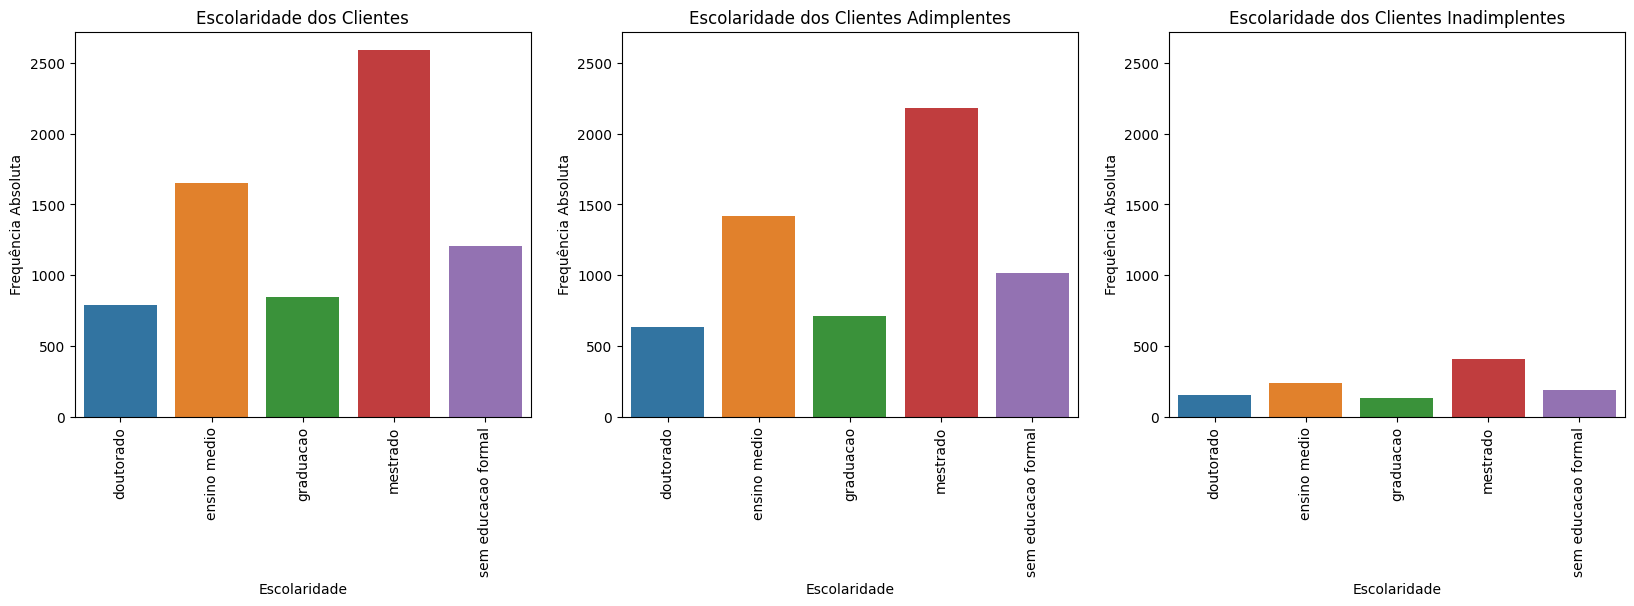

In [ ]:
### PRIMEIRO GRÁFICO - ANALISANDO COM BASE NA ESCOLARIDADE ###

coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df_cleaned, df_adim, df_inadim]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Nesse primeiro gráfico vemos que temos , no geral, uma maior presença de clientes com mestrado e em segundo lugar clientes apenas com ensino médio. Quando vemos apenas os adimplentes ou apenas os inadimplentes, vemos esses dois grupos presentes sempre com a mesma proporção.

Por enquanto não podemos observar nenhuma correlação entre escolaridade e tendência de inadimplência.

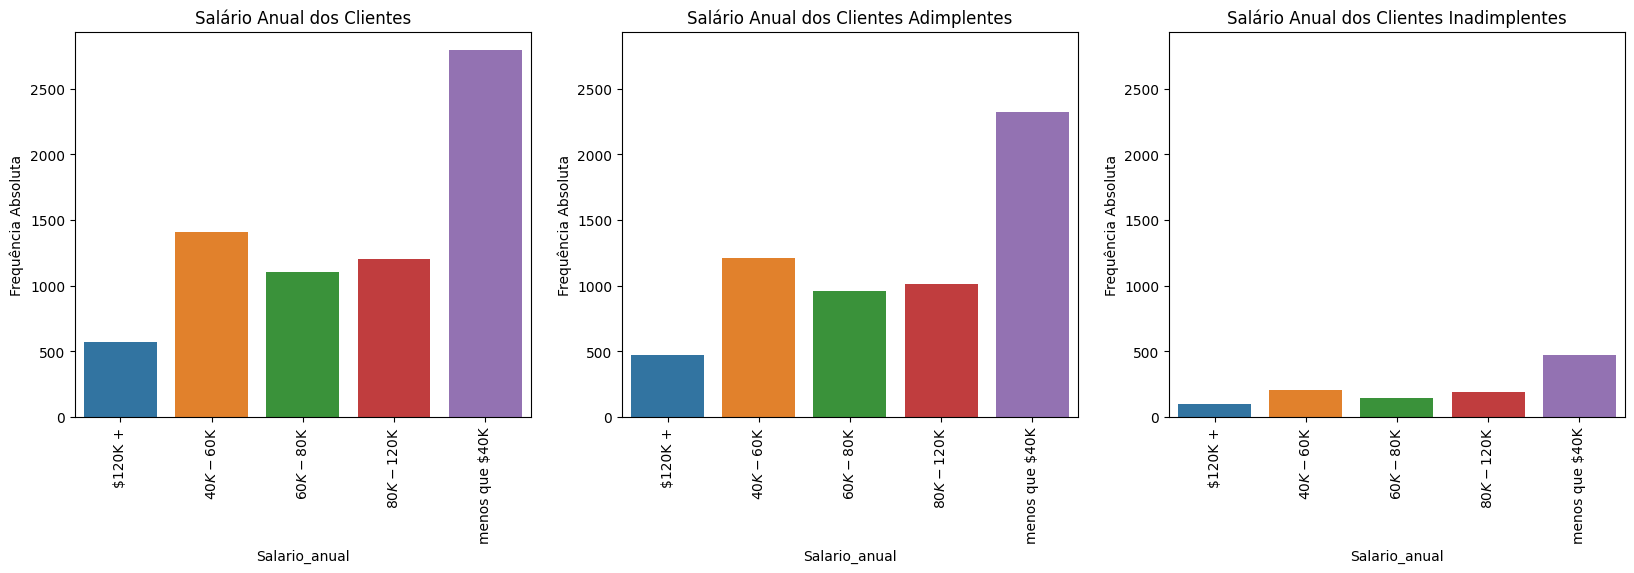

In [ ]:
### SEGUNDO GRÁFICO - ANALISANDO COM BASE NA ESCOLARIDADE ###

coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df_cleaned, df_adim, df_inadim]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Vemos na análise do gráfico com relação a faixa de salário anual praticamente idêntica a anterior, os dois maiores grupos de clientes são os que recebem menos que 40K anuais ou entre 40K e 60K.

Pois é justamente nestas faixas que observamos as maiores faixas de presença no grupo apenas de asimplentes e no grupos apenas de inadimplentes.  

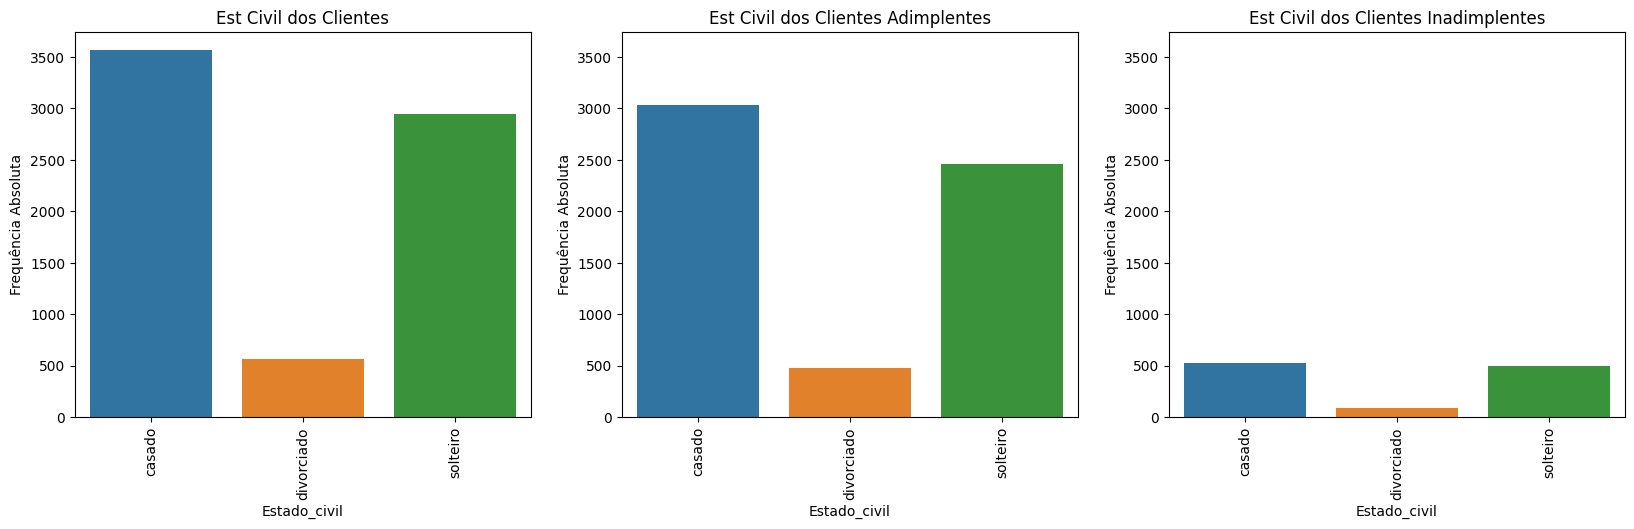

In [ ]:
### TERCEIRO GRÁFICO - ANALISANDO COM BASE NA ESCOLARIDADE ###

coluna = 'estado_civil'
titulos = ['Est Civil dos Clientes', 'Est Civil dos Clientes Adimplentes', 'Est Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df_cleaned, df_adim, df_inadim]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Os casados, seguidos pelos solteiros são os maiores inadimplentes, com divorciados por últimos. Será que temos algo aí ? Infelizmente não, quando olhamos apenas os adimplentes, ou o quadro geral, temos a mesmoa seqûencia.

As três vizualizações categóricas não nos ajudaram muito, por isso devemos partir para um próximo passo , com visualizações numéricas.

## Vizualições Numéricas

Para as vizualições numéricas, iremos utilizar os gráficos de histograma e de dispersão.

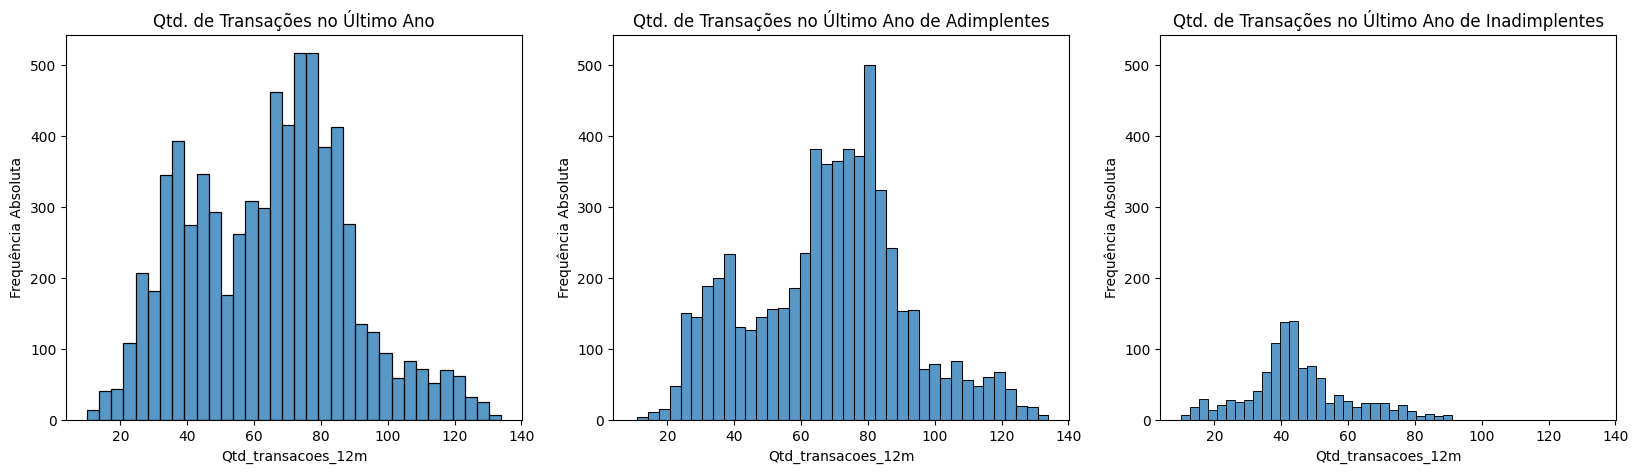

In [ ]:
### HISTOGRAMA ANALISANDO QUANTIDADE DE TRANSAÇÕES NO ANO ###

coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df_cleaned, df_adim, df_inadim]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Analisando esse nosso primeiro histograma, vemos que no geral temos dois intervalos grandes de números de pedidos, clientes que usam entre 60 e 80 vezes no ano, e clientes que usam entre 20 e 40 vezes. Esses picos se repetem quando analisamos apenas a base dos adimplentes, já nos idadimplentes não, existe apenas um intervalo com grande frequência, nessa faixa de 40 utilizações, um número baixo de utilizações.


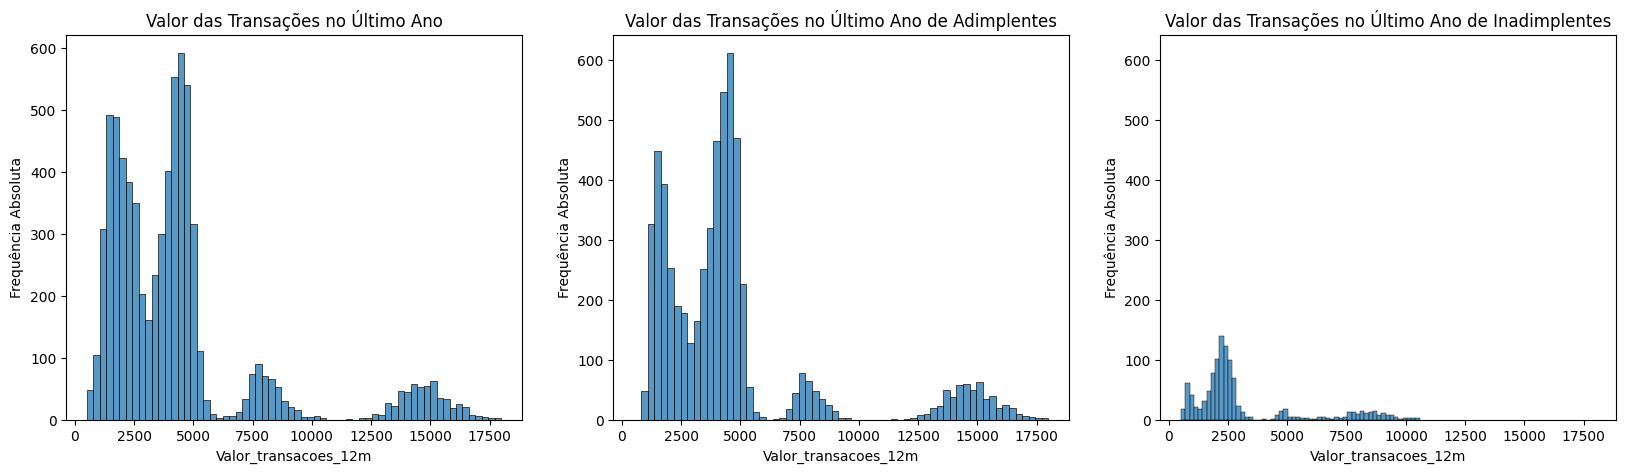

In [ ]:
### HISTOGRAMA ANALISANDO VALORES ANUAIS DE TRANSAÇÕES ###

coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df_cleaned, df_adim, df_inadim]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Analisando o histograma de valores das transações, mais uma vez temos duas faixas que, no geral, se  destacam, ao redor dos R$ 2.500 e R$ 5.000.

Isso se observa também no grupo apenas de adimplentes, porém vendo apenas os inadimplentes voltamos a verificar apenas uma faixa com maior presença, a de R$ 2.500.

O próximo passo é vermos essas nossas duas últimas análises em único gráfico, o de dispersão, que provavelmente deve trazer o grupo dos idadimplentes bem vinculados a essas características que observamos, a menos utilização e valores menores.



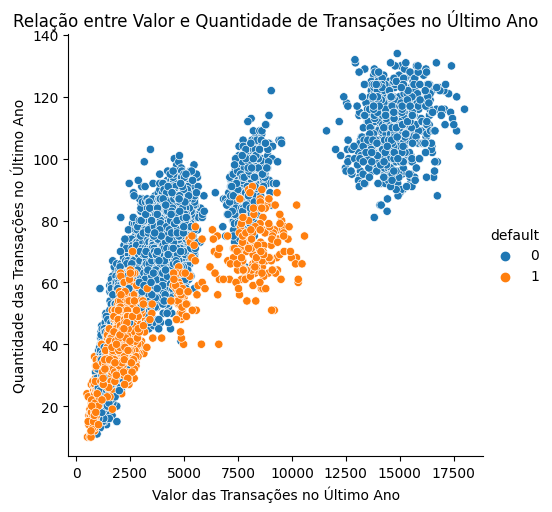

In [ ]:
### GRÁFICO DE DISPERSÃO ###

f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df_cleaned, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

O gráfico de dispersão confirma o que há havíamos identificado, aonde vemos clientes que utilizam mais vezes o cartão e com transações de valores mais altas, vemos menos idadimplentes(sejam eles mestres, solteiros, etc).


# 4) Conclusões

O ponto que fica nítido em nossa conclusão é que clientes idadimplentes provavelmente param e são até impedidos de utilizar o cartão  e transacionar após entrarem nesse quadro.

Isso é ruim para eles e para nosso banco, e tudo isso devido a dívida de valores baixos.

O ideal nesse caso providenciar urgente renegociação com esses clientes para que voltem a utilizar e transacionar o quanto antes, juntamente com uma reanálise de quanto crédito deve ser novamente destinada a parte desses clientes, em conjunto com algum progama de educação financeira.

Isso claro, além de revisão geral dos processos de análises de crédito, pois conceder cartão de crédito ou empréstimos é muito simples, existe uma demanda enorme por isso, porém sem o devido cuidade e análise, a operação torna-se uma grande dor de cabeça, até mesmo para apenas recuperar os valores, quando mais com a devida rentabilidade.

